In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import quantile_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [20]:
# reading the data in a DataFrame

boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['price'] = boston.target
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


No Missing Values 

<AxesSubplot:>

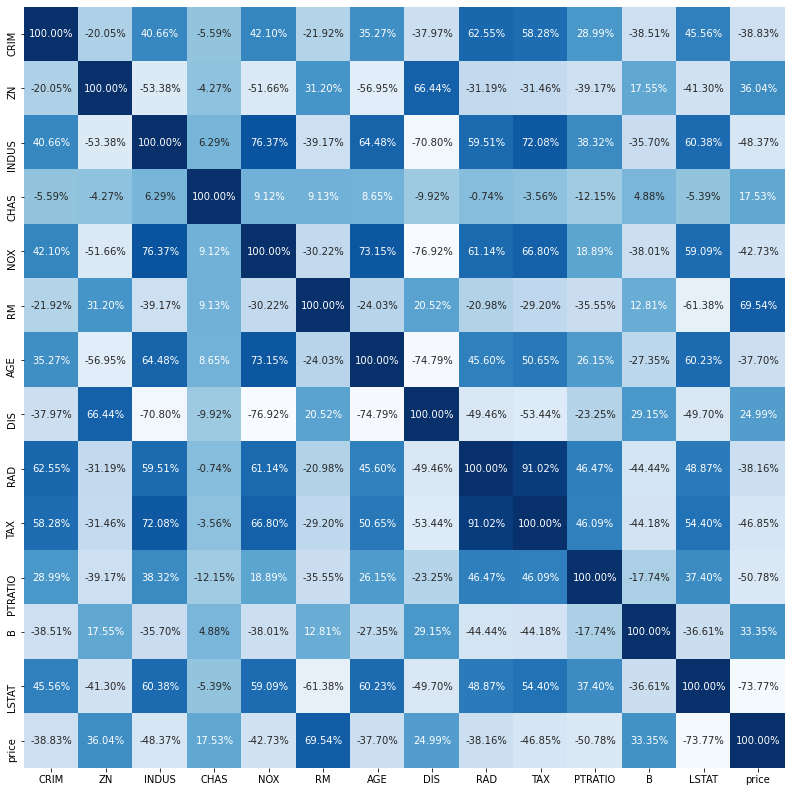

In [21]:
corr=bos.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Blues')

In [22]:
import warnings

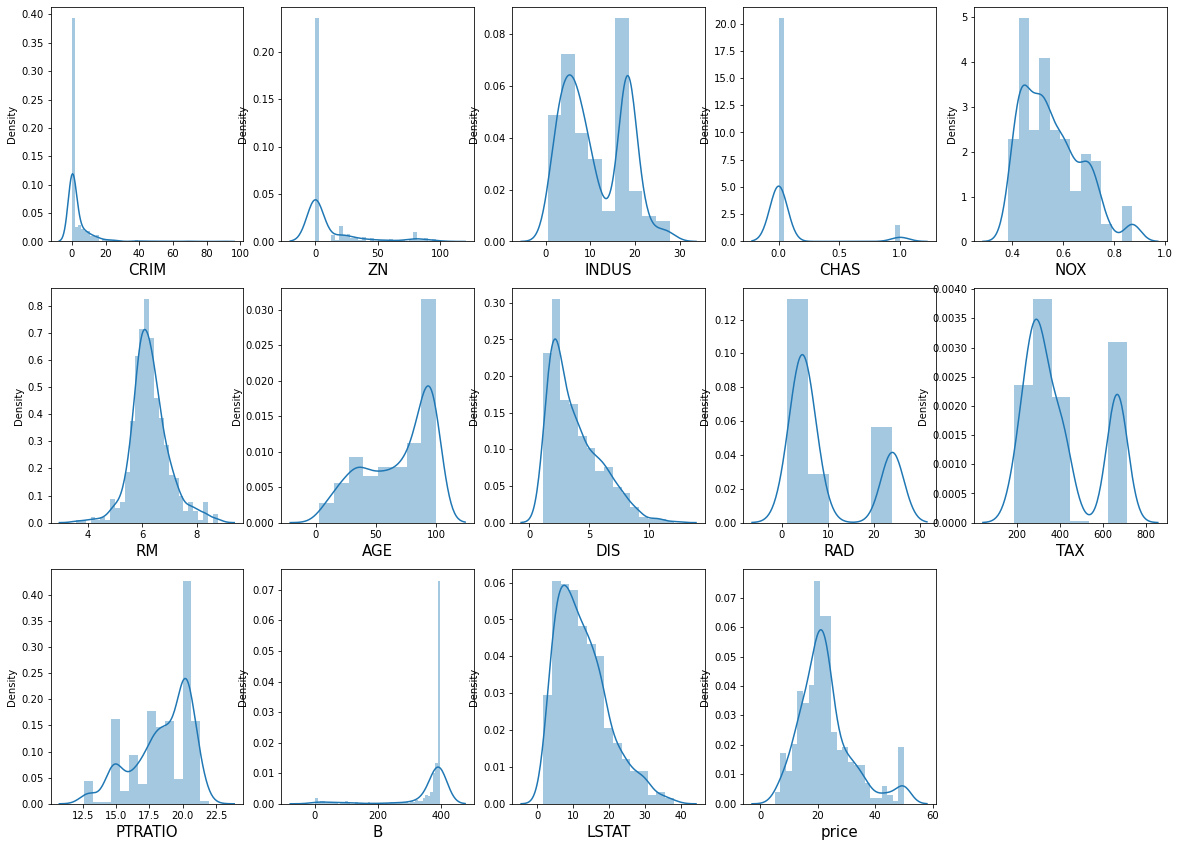

In [23]:
#cheking how data is distributed

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=15:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
warnings.filterwarnings('ignore')
plt.show()

In [5]:
y = bos['price']
X = bos.drop(columns = ['price'])

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.32,random_state=42)

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [7]:
regression.score(x_train,y_train)

0.7418584859083597

In [8]:
y_pred = regression.predict(x_train)

In [9]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [10]:
print('R2 score on training data is',regression.score(x_train,y_train))
print('Adjusted R2 score on training data is',adj_r2(x_train,y_train))
print('R2 score on test data is',regression.score(x_test,y_test))
print('Adjusted R2 score on test data is',adj_r2(x_test,y_test))

R2 score on training data is 0.7418584859083597
Adjusted R2 score on training data is 0.7316892747471739
R2 score on test data is 0.7171424713100198
Adjusted R2 score on test data is 0.6922968775737378
